In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

G_FOLDER = '/content/drive/MyDrive/Colab_Notebooks/'
DATASET_FOLDER = '/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/'

Mounted at /content/drive


In [ ]:
dataset_path = {
  'a1_1':['PICK','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/a1_1.csv'],
  'a3_1':['PICK','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/a3_1.csv'],
  'c3_1':['PICK','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/c3_1.csv'],
  'c2_1':['PICK','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/c2_1.csv'],
  'c1_1':['PICK','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/c1_1.csv'],
  'HD':['UND1','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Horizontal_Down.csv'],
  'HU':['UND1','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Horizontal_Up.csv'],
  'SB':['UND1','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Side_Back.csv'],
  #'SF':['UND1','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Side_Front.csv'],
  'VD':['UND1','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Vertical_Down.csv'],
  'VU':['UND1','/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Vertical_Up.csv'],
}

In [ ]:
df = pd.DataFrame()
class_end_index = []

for i in dataset_path:
  print(i)
  dataframe_temp = pd.read_csv(dataset_path[i][1], header=0)
  class_end_index.append(len(dataframe_temp))
  print(dataframe_temp.info())
  list_temp = [dataset_path[i][0] for j in range(0, len(dataframe_temp))]
  dataframe_temp['class'] = list_temp
  frames = [df, dataframe_temp]
  df = pd.concat(frames)

a1_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gx      111 non-null    int64
 1   gy      111 non-null    int64
 2   gz      111 non-null    int64
 3   x       111 non-null    int64
 4   y       111 non-null    int64
 5   z       111 non-null    int64
dtypes: int64(6)
memory usage: 5.3 KB
None
a3_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gx      111 non-null    int64
 1   gy      111 non-null    int64
 2   gz      111 non-null    int64
 3   x       111 non-null    int64
 4   y       111 non-null    int64
 5   z       111 non-null    int64
dtypes: int64(6)
memory usage: 5.3 KB
None
c3_1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 6 columns):
 #   Column  Non-Null Count

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/dataset.csv')

In [ ]:
print(df['class'].nunique())
print(df['class'].unique())

2
['PICK' 'UND1']


In [ ]:
for i in df['class'].unique():
  print('Item in '+ i +' Classs is' + str(df[df['class']==i].count()) + '\r\n')

Item in PICK Classs isgx       554
gy       554
gz       554
x        554
y        554
z        554
class    554
dtype: int64

Item in UND1 Classs isgx       26988
gy       26988
gz       26988
x        26988
y        26988
z        26988
class    26988
dtype: int64



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27542 entries, 0 to 6568
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gx      27542 non-null  int64 
 1   gy      27542 non-null  int64 
 2   gz      27542 non-null  int64 
 3   x       27542 non-null  int64 
 4   y       27542 non-null  int64 
 5   z       27542 non-null  int64 
 6   class   27542 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.7+ MB


In [ ]:
df

,gx,gy,gz,x,y,z,class
0,-1,-1,-1,-61,-4,7,PICK
1,-1,-1,-1,-61,-4,8,PICK
2,-1,-1,-1,-61,-4,7,PICK
3,-1,-1,-1,-61,-3,6,PICK
4,-1,-1,-1,-61,-3,6,PICK
...,...,...,...,...,...,...,...
6564,0,0,0,7,-67,5,UND1
6565,0,-1,-1,9,-65,7,UND1
6566,0,-1,0,9,-66,9,UND1
6567,0,-1,0,7,-66,9,UND1


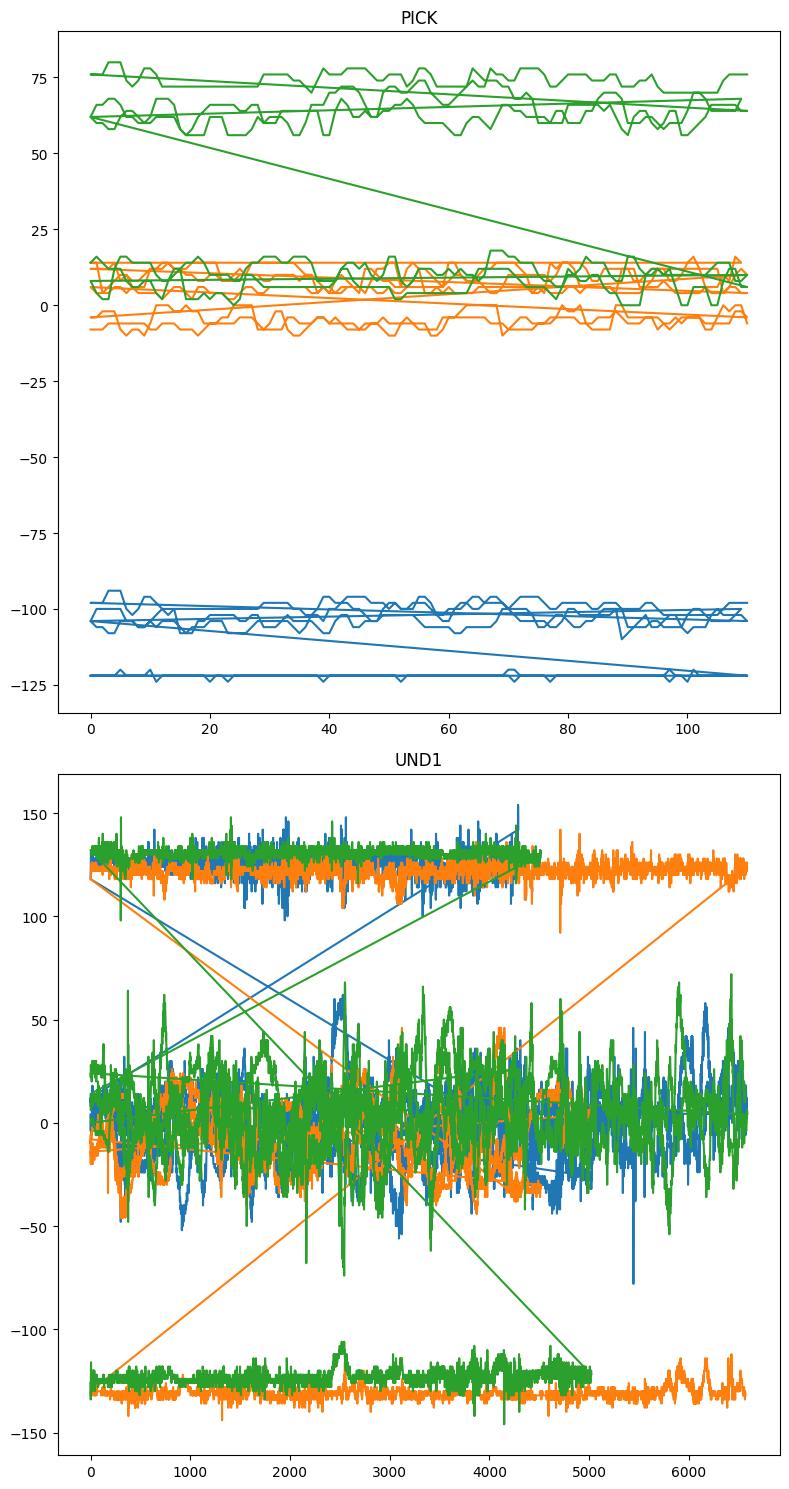

In [ ]:
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(8)

for count,i in enumerate(df['class'].unique()):
  data_plot = df[df['class'] == i]
  plt.subplot(df['class'].nunique(), 1, count+1)
  plt.plot(data_plot[['x','y','z']] * 2 )
  plt.title(i)
  fig.tight_layout()

  #print(count)
plt.show()

<Axes: >

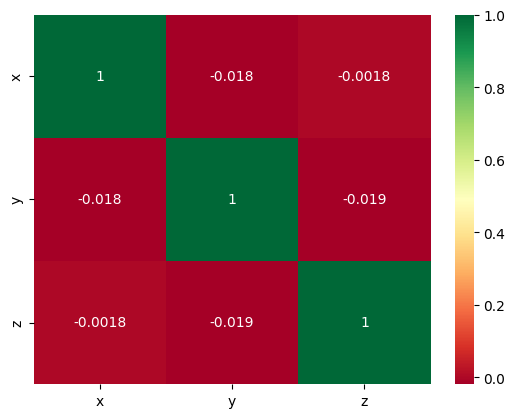

In [ ]:
sns.heatmap((df[['x','y','z']]).corr(),  annot=True, yticklabels=True, cmap='RdYlGn')

#sns.heatmap(df[['x','y','z','gx','gy','gz']].corr(),  annot=True, yticklabels=True, cmap='RdYlGn')

In [ ]:
#print(df['class'].nunique())
#print(df['class'].unique())

df_val = df.copy()

label_encoder = preprocessing.LabelEncoder()
df_val['class']= label_encoder.fit_transform(df_val['class'])
print(df_val['class'].unique())


[0 1]


In [ ]:

df_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27542 entries, 0 to 6568
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   gx      27542 non-null  int64
 1   gy      27542 non-null  int64
 2   gz      27542 non-null  int64
 3   x       27542 non-null  int64
 4   y       27542 non-null  int64
 5   z       27542 non-null  int64
 6   class   27542 non-null  int64
dtypes: int64(7)
memory usage: 1.7 MB


In [ ]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#y = to_categorical(df_val['class'], num_classes = 8)
y = to_categorical(df_val['class'])
x = df_val.drop(['class', 'gx',	'gy',	'gz'], axis =1)

x_scaled = (x) /128.0

In [ ]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
x_scaled

,x,y,z
0,-0.476562,-0.031250,0.054688
1,-0.476562,-0.031250,0.062500
2,-0.476562,-0.031250,0.054688
3,-0.476562,-0.023438,0.046875
4,-0.476562,-0.023438,0.046875
...,...,...,...
6564,0.054688,-0.523438,0.039062
6565,0.070312,-0.507812,0.054688
6566,0.070312,-0.515625,0.070312
6567,0.054688,-0.515625,0.070312


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_scaled, y, train_size = 0.7, random_state=4)

print('xtrain: ',xtrain.shape)
print('xtest: ',xtest.shape)
print('ytrain: ',ytrain.shape)
print('ytest: ',ytest.shape)
print(xtrain.shape[1])

xtrain:  (19279, 3)
xtest:  (8263, 3)
ytrain:  (19279, 2)
ytest:  (8263, 2)
3


In [ ]:
print(ytrain)
print(np.unique(ytrain))

print(ytrain.shape[1])

[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]
[0. 1.]
2


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 32        
                                                                 
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                544       
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 64)                2112      
                                                                 
 dropout_6 (Dropout)         (None, 64)               

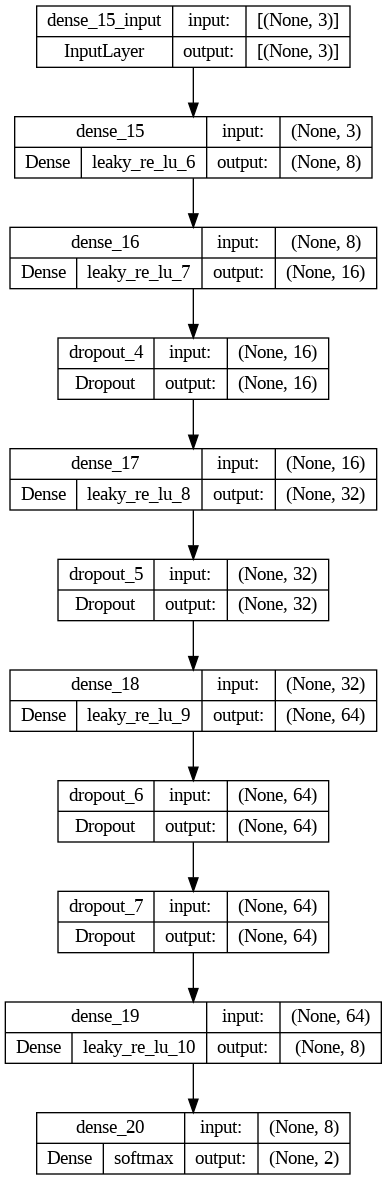

In [ ]:
import tensorflow as tf
from keras import layers

model = tf.keras.Sequential([
        layers.Dense(8, activation='LeakyReLU', input_shape = [xtrain.shape[1]]),
        layers.Dense(16, activation='LeakyReLU'),
        layers.Dropout(0.2),
        layers.Dense(32, activation='LeakyReLU'),
        layers.Dropout(0.2),
        layers.Dense(64, activation='LeakyReLU'),
        layers.Dropout(0.2),
        #layers.Dense(128, activation='LeakyReLU'),
        #layers.Dropout(0.2),
        #layers.Dense(32, activation='LeakyReLU'),
        layers.Dropout(0.2),
        #layers.Dense(16, activation='LeakyReLU'),
        layers.Dense(8, activation='LeakyReLU'),
        #layers.Dense(16, activation='LeakyReLU'),
        #layers.Dropout(0.2),
        #layers.Dense(8, activation='LeakyReLU'),
        layers.Dense(ytrain.shape[1], activation='softmax'),
])

model.summary()
tf.keras.utils.plot_model(model, 'model_pos.png', show_shapes=True, show_layer_activations=True)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=25, verbose=1, restore_best_weights=True)

history = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs = 100, batch_size = 32, callbacks=[earlystop] )

Epoch 1/100
603/603 [==============================] - 5s 5ms/step - loss: 0.0656 - accuracy: 0.9857 - val_loss: 4.8881e-04 - val_accuracy: 1.0000
Epoch 2/100
603/603 [==============================] - 2s 3ms/step - loss: 5.9878e-04 - accuracy: 0.9999 - val_loss: 7.6934e-06 - val_accuracy: 1.0000
Epoch 3/100
603/603 [==============================] - 2s 3ms/step - loss: 8.7597e-05 - accuracy: 1.0000 - val_loss: 1.8446e-06 - val_accuracy: 1.0000
Epoch 4/100
603/603 [==============================] - 2s 3ms/step - loss: 1.1665e-04 - accuracy: 1.0000 - val_loss: 4.7668e-07 - val_accuracy: 1.0000
Epoch 5/100
603/603 [==============================] - 2s 3ms/step - loss: 2.6442e-04 - accuracy: 0.9998 - val_loss: 3.9535e-07 - val_accuracy: 1.0000
Epoch 6/100
603/603 [==============================] - 2s 3ms/step - loss: 6.0334e-05 - accuracy: 1.0000 - val_loss: 8.9313e-08 - val_accuracy: 1.0000
Epoch 7/100
603/603 [==============================] - 3s 4ms/step - loss: 3.8590e-06 - accuracy: 

In [ ]:
model.evaluate(xtest, ytest)

259/259 [==============================] - 1s 2ms/step - loss: 7.6934e-06 - accuracy: 1.0000


[7.693372936046217e-06, 1.0]

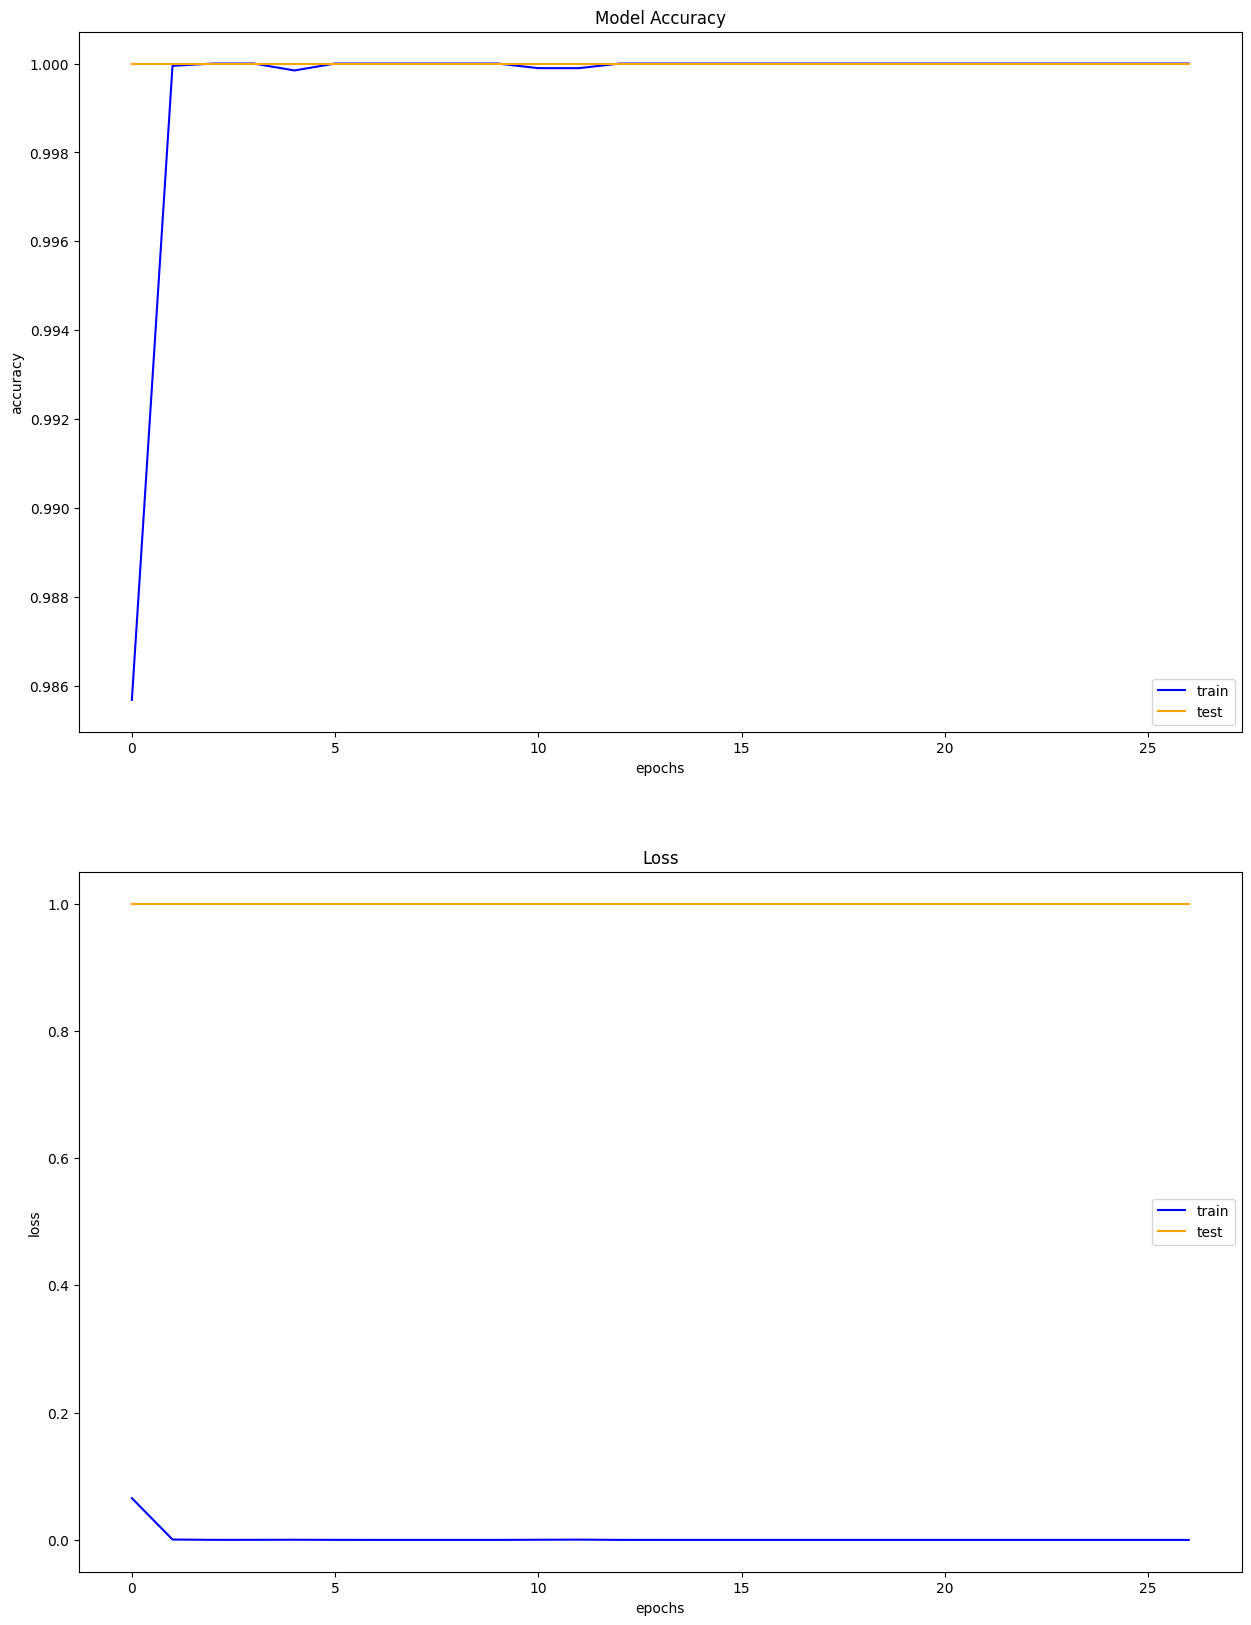

In [ ]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.title("Loss")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [ ]:
#rough work

from sklearn import metrics

#pos = 1700

#x_num = x.iloc[pos].to_numpy().reshape(1,3)
#print(x_num,"\r\n",y[pos])
#x_val = x_num/128.0
x_num = [[64.0/128.0, -5.0/128.0, 4.0/128.0]]
#x_num = [[(64.0*2)/128.0, (-5.0*2)/128.0]]
x_val = pd.DataFrame(x_num)
print(x_val.shape)
#a =np.array([[ 0.04174805, -0.04904175,  0.51126099, -0.00360107,  0.00210571, 0.00109863]])
predictions = model.predict(x_val)
print(predictions)
predictions

#type(xtest.to_numpy())

#print('X_Test Accuracy: ', metrics.accuracy_score(ytest,predictions))

(1, 3)
1/1 [==============================] - 0s 100ms/step
[[5.02564e-20 1.00000e+00]]


array([[5.02564e-20, 1.00000e+00]], dtype=float32)

In [ ]:
import os
import math
import glob
import json

SAVED_MODEL_FILENAME = os.path.join(DATASET_FOLDER, "Test_Sensor_Orientation")
FLOAT_TFL_MODEL_FILENAME = os.path.join(DATASET_FOLDER, "Test_sensor_orientation_float3.tfl")
QUANTIZED_TFL_MODEL_FILENAME = os.path.join(DATASET_FOLDER, "Test_sensor_orientation_quantized3.tfl")
TFL_CC_MODEL_FILENAME = os.path.join(DATASET_FOLDER, "Test_sensor_orientation3.cc")

print("SAVED_MODEL_FILENAME: ", SAVED_MODEL_FILENAME)
print("FLOAT_TFL_MODEL_FILENAME: ", FLOAT_TFL_MODEL_FILENAME)
print("QUANTIZED_TFL_MODEL_FILENAME: ", QUANTIZED_TFL_MODEL_FILENAME)
print("TFL_CC_MODEL_FILENAME: ", TFL_CC_MODEL_FILENAME)

model.save(SAVED_MODEL_FILENAME)

SAVED_MODEL_FILENAME:  /content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Test_Sensor_Orientation
FLOAT_TFL_MODEL_FILENAME:  /content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Test_sensor_orientation_float3.tfl
QUANTIZED_TFL_MODEL_FILENAME:  /content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Test_sensor_orientation_quantized3.tfl
TFL_CC_MODEL_FILENAME:  /content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Test_sensor_orientation3.cc


In [ ]:
def representative_dataset():
  val = x_scaled
  for i in val.index:
    data = val.iloc[i].to_numpy()
    data = data.reshape(1,data.shape[0])
    yield [data.astype(np.float32)]

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(SAVED_MODEL_FILENAME)
model_no_quant_tflite = converter.convert()

# Save the model to disk
open(FLOAT_TFL_MODEL_FILENAME, "wb").write(model_no_quant_tflite)

17612

In [ ]:
# Set the optimization flag.
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Enforce integer only quantization
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.target_spec.supported_types = [tf.int8]
converter.inference_input_type = tf.int8
converter.inference_output_type = tf.int8
# Provide a representative dataset to ensure we quantize correctly.
converter.representative_dataset = representative_dataset
model_tflite = converter.convert()

# Save the model to disk
open(QUANTIZED_TFL_MODEL_FILENAME, "wb").write(model_tflite)

8776

In [ ]:
def get_dir_size(dir):
  size = 0
  for f in os.scandir(dir):
    if f.is_file():
      size += f.stat().st_size
    elif f.is_dir():
      size += get_dir_size(f.path)
  return size

# Calculate size
size_tf = get_dir_size(SAVED_MODEL_FILENAME)
size_no_quant_tflite = os.path.getsize(FLOAT_TFL_MODEL_FILENAME)
size_tflite = os.path.getsize(QUANTIZED_TFL_MODEL_FILENAME)

# Compare size
pd.DataFrame.from_records(
    [["TensorFlow", f"{size_tf} bytes", ""],
     ["TensorFlow Lite", f"{size_no_quant_tflite} bytes ", f"(reduced by {size_tf - size_no_quant_tflite} bytes)"],
     ["TensorFlow Lite Quantized", f"{size_tflite} bytes", f"(reduced by {size_no_quant_tflite - size_tflite} bytes)"]],
     columns = ["Model", "Size", ""], index="Model")

,Size,
Model,,
TensorFlow,284215 bytes,
TensorFlow Lite,17612 bytes,(reduced by 266603 bytes)
TensorFlow Lite Quantized,8776 bytes,(reduced by 8836 bytes)


In [ ]:
# Install xxd if it is not available
!apt-get update && apt-get -qq install xxd
# Convert to a C source file, i.e, a TensorFlow Lite for Microcontrollers model
!xxd -i {QUANTIZED_TFL_MODEL_FILENAME} {TFL_CC_MODEL_FILENAME}
# Update variable names
REPLACE_TEXT = QUANTIZED_TFL_MODEL_FILENAME.replace('/', '_').replace('.', '_')

!sed -i 's/'{REPLACE_TEXT}'/g_model/g' {TFL_CC_MODEL_FILENAME}


Hit:1 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done


In [ ]:
# Print the C source file
!cat '/content/drive/MyDrive/Colab_Notebooks/test_dataset_redwedge_2/Test_sensor_orientation3.cc'
# !tail {TFL_CC_MODEL_FILENAME} # run this command to just see the end of the file (aka the size)

unsigned char g_model[] = {
  0x1c, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x14, 0x00, 0x20, 0x00,
  0x1c, 0x00, 0x18, 0x00, 0x14, 0x00, 0x10, 0x00, 0x0c, 0x00, 0x00, 0x00,
  0x08, 0x00, 0x04, 0x00, 0x14, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00,
  0x98, 0x00, 0x00, 0x00, 0xf0, 0x00, 0x00, 0x00, 0x58, 0x11, 0x00, 0x00,
  0x68, 0x11, 0x00, 0x00, 0xc0, 0x21, 0x00, 0x00, 0x03, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x10, 0x00, 0x00, 0x00, 0x00, 0x00, 0x0a, 0x00,
  0x10, 0x00, 0x0c, 0x00, 0x08, 0x00, 0x04, 0x00, 0x0a, 0x00, 0x00, 0x00,
  0x0c, 0x00, 0x00, 0x00, 0x1c, 0x00, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00,
  0x0f, 0x00, 0x00, 0x00, 0x73, 0x65, 0x72, 0x76, 0x69, 0x6e, 0x67, 0x5f,
  0x64, 0x65, 0x66, 0x61, 0x75, 0x6c, 0x74, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x90, 0xff, 0xff, 0xff, 0x18, 0x00, 0x00, 0x00,
  0x04, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00, 0x64, 0x65, 0x6e, 0x73,
  0x65, 0x5f, 0x32, 0x30, 0x00, 0x00, 0x00, 0x00, 0x01, 0x00, 0x00, 0x00,
  0x04, 0x

###Check Input Tensor Shape

In [ ]:
interpreter = tf.lite.Interpreter(model_path = QUANTIZED_TFL_MODEL_FILENAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [1 3]
Input Type: <class 'numpy.int8'>
Output Shape: [1 2]
Output Type: <class 'numpy.int8'>


In [ ]:
print(input_details)
print(output_details)

[{'name': 'serving_default_dense_15_input:0', 'index': 0, 'shape': array([1, 3], dtype=int32), 'shape_signature': array([-1,  3], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.004503676667809486, -1), 'quantization_parameters': {'scales': array([0.00450368], dtype=float32), 'zero_points': array([-1], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'StatefulPartitionedCall:0', 'index': 24, 'shape': array([1, 2], dtype=int32), 'shape_signature': array([-1,  2], dtype=int32), 'dtype': <class 'numpy.int8'>, 'quantization': (0.00390625, -128), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([-128], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [ ]:
# For Testing
index_loc = 0
dataset_pos = class_end_index
for pos in dataset_pos:
  pos = pos-1
  index_loc += pos
  #print(index_loc)
  #print(y[index_loc])
  print('"',df['class'].iloc[index_loc],'",\t\t\t //', y[index_loc].argmax())
  #print(x.iloc[index_loc])
  #print('\r\n')

" PICK ",			 // 0
" PICK ",			 // 0
" PICK ",			 // 0
" PICK ",			 // 0
" PICK ",			 // 0
" UND1 ",			 // 1
" UND1 ",			 // 1
" UND1 ",			 // 1
" UND1 ",			 // 1
" UND1 ",			 // 1
